In [1]:
import torch
import warnings
import numpy as np
import torch.nn as nn
from time import time
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
from datasets.cityscapes import CityScapes
from torchvision.transforms import ToPILImage
from fvcore.nn import FlopCountAnalysis, flop_count_table

from utils import fast_hist, per_class_iou
from models.bisenet.build_bisenet import BiSeNet

warnings.filterwarnings("ignore")

In [2]:
## Training
device = torch.device("cuda")
# Load model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)

# Set model to training mode
model.train()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=1)

# Loss function
criterion = nn.CrossEntropyLoss(ignore_index=255)
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

# Set model to training mode
model.train()
# Training loop
for epoch in range(50):
    hist = np.zeros((19, 19))
    # Iterate over the dataset
    for i, (images, labels) in enumerate(tqdm(dataloader)):
        # Move the data to the device
        images = images.to(device)
        label = labels.to(device)
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        output = model(images)[0]
        # Compute the loss
        loss = criterion(output, label)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Compute the predictions
        pred = output.argmax(dim=1)

        # Calculate the mean IoU
        hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
        miou = np.mean(per_class_iou(hist))

    # Print the loss and mIoU
    print(f'Epoch: {epoch}, Loss: {loss.item()}, mIoU: {miou}')

# Save the model
torch.save(model.state_dict(), 'models/bisenet/bisenet.pth')

100%|██████████| 125/125 [03:59<00:00,  1.92s/it]


Epoch: 0, Loss: 0.6270601749420166, mIoU: 0.19253267176022373


100%|██████████| 125/125 [03:57<00:00,  1.90s/it]


Epoch: 1, Loss: 0.6603593826293945, mIoU: 0.2573051884226215


100%|██████████| 125/125 [03:51<00:00,  1.85s/it]


Epoch: 2, Loss: 0.508508026599884, mIoU: 0.29617940180461355


100%|██████████| 125/125 [03:58<00:00,  1.90s/it]


Epoch: 3, Loss: 0.48374077677726746, mIoU: 0.33409788366901927


100%|██████████| 125/125 [04:02<00:00,  1.94s/it]


Epoch: 4, Loss: 0.33759060502052307, mIoU: 0.3702187595240202


100%|██████████| 125/125 [03:52<00:00,  1.86s/it]


Epoch: 5, Loss: 0.3800247013568878, mIoU: 0.3983250920621863


100%|██████████| 125/125 [03:59<00:00,  1.92s/it]


Epoch: 6, Loss: 0.3699791133403778, mIoU: 0.42900736158474156


100%|██████████| 125/125 [03:51<00:00,  1.85s/it]


Epoch: 7, Loss: 0.4297184646129608, mIoU: 0.4470821135024857


100%|██████████| 125/125 [04:00<00:00,  1.92s/it]


Epoch: 8, Loss: 0.39346402883529663, mIoU: 0.4731429516146734


100%|██████████| 125/125 [04:01<00:00,  1.93s/it]


Epoch: 9, Loss: 0.35163944959640503, mIoU: 0.49328567846158494


100%|██████████| 125/125 [04:00<00:00,  1.93s/it]


Epoch: 10, Loss: 0.33536019921302795, mIoU: 0.5094016156238879


100%|██████████| 125/125 [04:00<00:00,  1.92s/it]


Epoch: 11, Loss: 0.25835564732551575, mIoU: 0.5225956299543002


100%|██████████| 125/125 [04:01<00:00,  1.93s/it]


Epoch: 12, Loss: 0.30303895473480225, mIoU: 0.5385062015744427


100%|██████████| 125/125 [03:49<00:00,  1.83s/it]


Epoch: 13, Loss: 0.3842148780822754, mIoU: 0.5441599111914633


100%|██████████| 125/125 [03:50<00:00,  1.85s/it]


Epoch: 14, Loss: 0.25967684388160706, mIoU: 0.5629087458928026


100%|██████████| 125/125 [03:51<00:00,  1.85s/it]


Epoch: 15, Loss: 0.3357204794883728, mIoU: 0.5695302515066905


100%|██████████| 125/125 [04:00<00:00,  1.92s/it]


Epoch: 16, Loss: 0.24896016716957092, mIoU: 0.5715720544668443


100%|██████████| 125/125 [03:50<00:00,  1.84s/it]


Epoch: 17, Loss: 0.2700155973434448, mIoU: 0.5821110820611155


100%|██████████| 125/125 [04:00<00:00,  1.93s/it]


Epoch: 18, Loss: 0.2999371290206909, mIoU: 0.589966439097714


100%|██████████| 125/125 [04:00<00:00,  1.92s/it]


Epoch: 19, Loss: 0.2795737385749817, mIoU: 0.5947214095921296


100%|██████████| 125/125 [03:51<00:00,  1.85s/it]


Epoch: 20, Loss: 0.23618638515472412, mIoU: 0.5998913886700518


100%|██████████| 125/125 [03:59<00:00,  1.92s/it]


Epoch: 21, Loss: 0.2597869038581848, mIoU: 0.6050210292211001


100%|██████████| 125/125 [03:49<00:00,  1.83s/it]


Epoch: 22, Loss: 0.30511942505836487, mIoU: 0.6069363180230521


100%|██████████| 125/125 [03:59<00:00,  1.91s/it]


Epoch: 23, Loss: 0.24048583209514618, mIoU: 0.6107800559062442


100%|██████████| 125/125 [03:48<00:00,  1.83s/it]


Epoch: 24, Loss: 0.2517017424106598, mIoU: 0.6144928403915326


100%|██████████| 125/125 [03:52<00:00,  1.86s/it]


Epoch: 25, Loss: 0.24619907140731812, mIoU: 0.6214946773431371


100%|██████████| 125/125 [03:51<00:00,  1.85s/it]


Epoch: 26, Loss: 0.22776572406291962, mIoU: 0.6237172488236289


100%|██████████| 125/125 [03:59<00:00,  1.92s/it]


Epoch: 27, Loss: 0.26191264390945435, mIoU: 0.6266716215230285


100%|██████████| 125/125 [04:02<00:00,  1.94s/it]


Epoch: 28, Loss: 0.2076338827610016, mIoU: 0.6296601105794293


100%|██████████| 125/125 [04:01<00:00,  1.93s/it]


Epoch: 29, Loss: 0.22716642916202545, mIoU: 0.6314827613551494


100%|██████████| 125/125 [03:53<00:00,  1.87s/it]


Epoch: 30, Loss: 0.22374321520328522, mIoU: 0.6348252507855693


100%|██████████| 125/125 [03:51<00:00,  1.86s/it]


Epoch: 31, Loss: 0.19950303435325623, mIoU: 0.6351666978238975


100%|██████████| 125/125 [03:52<00:00,  1.86s/it]


Epoch: 32, Loss: 0.1961541771888733, mIoU: 0.6371140758755665


100%|██████████| 125/125 [03:54<00:00,  1.88s/it]


Epoch: 33, Loss: 0.17347049713134766, mIoU: 0.6398565059585039


100%|██████████| 125/125 [03:54<00:00,  1.87s/it]


Epoch: 34, Loss: 0.347496896982193, mIoU: 0.6392852897855846


100%|██████████| 125/125 [03:54<00:00,  1.88s/it]


Epoch: 35, Loss: 0.2580786347389221, mIoU: 0.6443353414374541


100%|██████████| 125/125 [03:49<00:00,  1.84s/it]


Epoch: 36, Loss: 0.272128164768219, mIoU: 0.6440275071795881


100%|██████████| 125/125 [04:01<00:00,  1.93s/it]


Epoch: 37, Loss: 0.19764836132526398, mIoU: 0.646858235623569


100%|██████████| 125/125 [03:55<00:00,  1.88s/it]


Epoch: 38, Loss: 0.22193901240825653, mIoU: 0.6493054618065608


100%|██████████| 125/125 [04:03<00:00,  1.95s/it]


Epoch: 39, Loss: 0.1992558389902115, mIoU: 0.649726939675138


100%|██████████| 125/125 [04:02<00:00,  1.94s/it]


Epoch: 40, Loss: 0.22740903496742249, mIoU: 0.6514341050691131


100%|██████████| 125/125 [03:57<00:00,  1.90s/it]


Epoch: 41, Loss: 0.2374940663576126, mIoU: 0.6547012875581025


100%|██████████| 125/125 [03:54<00:00,  1.88s/it]


Epoch: 42, Loss: 0.2274027168750763, mIoU: 0.6548977071017937


100%|██████████| 125/125 [04:00<00:00,  1.92s/it]


Epoch: 43, Loss: 0.25387895107269287, mIoU: 0.6581871921682471


100%|██████████| 125/125 [03:54<00:00,  1.88s/it]


Epoch: 44, Loss: 0.2728457748889923, mIoU: 0.6589176157664675


100%|██████████| 125/125 [04:01<00:00,  1.93s/it]


Epoch: 45, Loss: 0.24036821722984314, mIoU: 0.6584878086466373


100%|██████████| 125/125 [03:53<00:00,  1.87s/it]


Epoch: 46, Loss: 0.17879556119441986, mIoU: 0.6608928097127327


100%|██████████| 125/125 [03:54<00:00,  1.87s/it]


Epoch: 47, Loss: 0.19002607464790344, mIoU: 0.6628502945573744


100%|██████████| 125/125 [04:01<00:00,  1.94s/it]


Epoch: 48, Loss: 0.218143031001091, mIoU: 0.6640244814819983


100%|██████████| 125/125 [04:00<00:00,  1.93s/it]


Epoch: 49, Loss: 0.23719818890094757, mIoU: 0.6642158756621073


In [7]:
## Evaluation
# Get the device
device = torch.device("cuda")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

# Evaluate the model
hist = np.zeros((19, 19))
for i, (images, labels) in enumerate(tqdm(dataloader)):
    # Move the data to the device
    images = images.to(device)
    label = labels.to(device)
    # Forward pass
    output = model(images)[0]
    # Compute the predictions
    pred = output.argmax(dim=0)

    # Calculate the mean IoU
    hist += fast_hist(label.flatten().cpu().numpy(), pred.flatten().cpu().numpy(), 19)
    miou = np.mean(per_class_iou(hist))

# Print the mIoU
print(f'mIoU: {miou}')

100%|██████████| 500/500 [02:01<00:00,  4.12it/s]

mIoU: 0.6662004877262835


### Example

0it [00:00, ?it/s]


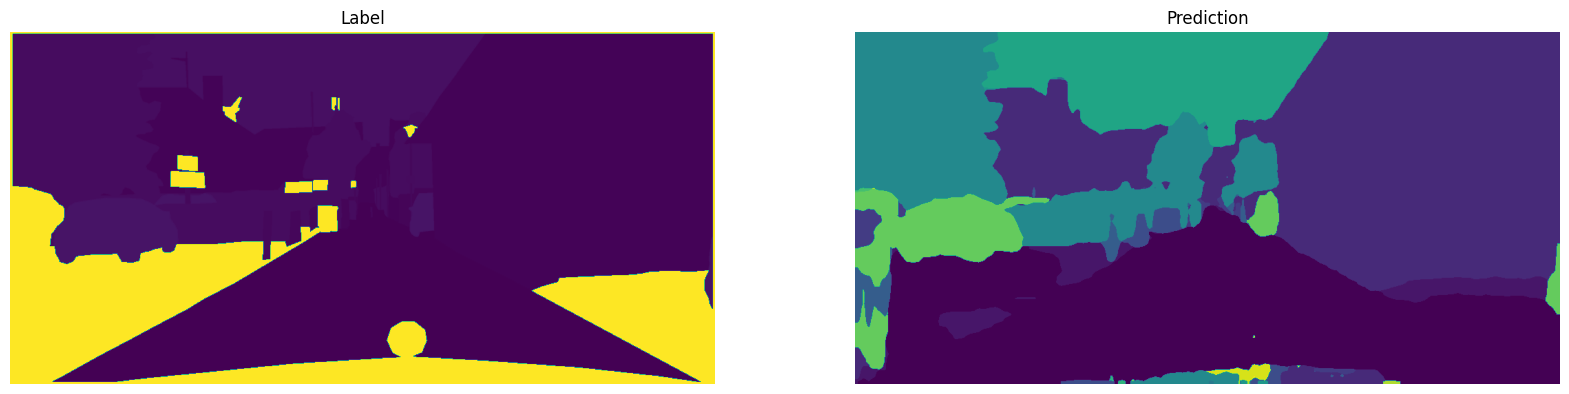

In [5]:
## Inference
# Get the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, pin_memory=True)

hist = np.zeros((19, 19))
for i, (image, label) in tqdm(enumerate(dataloader)):
    # Move the data to the device
    image = image.to(device)
    label = label.to(device)
    # Forward pass
    output = model(image)
    # Compute the predictions
    pred = output.argmax(dim=1)
    # Stop after the first iteration
    break

# Display the image
image = ToPILImage()(image[0].cpu())
# Convert label, pred from numpy to image
label = Image.fromarray(label[0].cpu().numpy().astype(np.uint8))
pred = Image.fromarray(pred[0].cpu().numpy().astype(np.uint8))

# Display the image
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(label)
plt.title('Label')
plt.axis('off')
plt.subplot(122)
plt.imshow(pred)
plt.title('Prediction')
plt.axis('off')
plt.show()

### FLOPs and Parameters

In [8]:
# Get the device
device = torch.device("cpu")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))
# Set model to evaluation mode
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)
# Get the image and label
image, label = dataset[0]

# Compute the number of flops
flops = FlopCountAnalysis(model, image.unsqueeze(0))
# Get the number of flops
flops = flop_count_table(flops)
# Get the number of parameters
params = sum(p.numel() for p in model.parameters())

print(f'Number of parameters: {params}\n')
print(flops)

Number of parameters: 50801192

| module                                      | #parameters or shape   | #flops     |
|:--------------------------------------------|:-----------------------|:-----------|
| model                                       | 50.801M                | 91.923G    |
|  saptial_path                               |  0.371M                |  5.088G    |
|   saptial_path.convblock1                   |   1.856K               |   0.243G   |
|    saptial_path.convblock1.conv1            |    1.728K              |    0.226G  |
|    saptial_path.convblock1.bn               |    0.128K              |    16.777M |
|   saptial_path.convblock2                   |   73.984K              |   2.424G   |
|    saptial_path.convblock2.conv1            |    73.728K             |    2.416G  |
|    saptial_path.convblock2.bn               |    0.256K              |    8.389M  |
|   saptial_path.convblock3                   |   0.295M               |   2.42G    |
|    saptial_path.conv

### Latency and FPS

In [10]:
# Get the device
device = torch.device("cpu")
# Load the model
model = BiSeNet(context_path='resnet101', num_classes=19).to(device)
model.load_state_dict(torch.load('models/bisenet/bisenet.pth'))
model.eval()

# Load the dataset
dataset = CityScapes(root_dir='datasets/Cityspaces', split='val', mode='single', raw_label=False)

# Get the image and label
image, label = dataset[0]

# Compute the latency and FPS
iterations = 100
latency = []
fps = []

# Run the model for a number of iterations
for _ in range(iterations):
    start = time()
    model(image.unsqueeze(0))
    end = time()
    latency.append(end - start)
    fps.append(1 / (end - start))

# Compute the average latency and FPS
mean_latency = np.mean(latency)
mean_fps = np.mean(fps)
std_latency = np.std(latency)
std_fps = np.std(fps)

# Print the results
print(f'Latency: {mean_latency:.3f} +/- {std_latency:.3f}')
print(f'FPS: {mean_fps:.3f} +/- {std_fps:.3f}')


Latency: 0.354 +/- 0.014
FPS: 2.825 +/- 0.103
